<div style="border:solid green 2px; padding: 20px">
    
<b>Hello!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1. I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__

An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). It would be good to add the progress and purpose of the study.

## Initialization

loading all libraries that are useful for dataframes and for the numerical calculations and to visualize the data and for the test hypothesis.

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Load data

loading all the data files that are stored as csv format

In [2]:
# Load the data files into different DataFrames
calls_df = pd.read_csv('/datasets/megaline_calls.csv')
internet_df = pd.read_csv('/datasets/megaline_internet.csv')
messages_df = pd.read_csv('/datasets/megaline_messages.csv')
plans_df = pd.read_csv('/datasets/megaline_plans.csv')
users_df = pd.read_csv('/datasets/megaline_users.csv')



## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame

plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
plans_df.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [5]:
# Print a sample of data for plans


plans_df.head(5)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


it shows significant variability between plans, with differences in included messages, data, and minutes. The data appears clean, but potential issues like missing values, inconsistent units (e.g., MB to GB), and outliers need to be verified.

## Fix data

[Fix obvious issues with the data given the initial observations.]

In [6]:
# 1. Check for missing values
print("Missing values per column:")
print(plans_df.isnull().sum())

Missing values per column:
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


In [7]:
# 2. Check for duplicates and drop them
duplicates = plans_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
plans_df = plans_df.drop_duplicates()


Number of duplicate rows: 0


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Duplicate checking is the basis of data preprocessing

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [8]:
# Convert MB to GB
plans_df['gb_per_month_included'] = plans_df['mb_per_month_included'] / 1024

## Users

In [9]:
# Print the general/summary information about the users' DataFrame

users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
# Print a sample of data for users
print(users_df.sample(5))
users_df.describe()


     user_id first_name last_name  age  \
165     1165      Nigel     Huber   20   
348     1348       Carl  Rutledge   60   
454     1454   Kymberly     Cohen   56   
243     1243     Isaias   Compton   71   
225     1225  Margarito    Barker   41   

                                                city    reg_date      plan  \
165  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA  2018-10-27      surf   
348                  Detroit-Warren-Dearborn, MI MSA  2018-10-05      surf   
454                San Antonio-New Braunfels, TX MSA  2018-05-30  ultimate   
243                    Phoenix-Mesa-Chandler, AZ MSA  2018-05-11      surf   
225                                 Columbia, SC MSA  2018-06-07      surf   

    churn_date  
165        NaN  
348        NaN  
454        NaN  
243        NaN  
225        NaN  


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


This data contains 500 unique users, with ages ranging from 18 to 75 and a mean age of 45 years. There are no apparent missing values or unrealistic age values, but it's good to check for duplicates in user_id and validate data types. If everything checks out, the dataset is clean and ready for analysis.

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [11]:
# Check for missing values
print("Missing values per column:")
print(users_df.isnull().sum())

Missing values per column:
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


In [12]:
# Drop rows with missing values (if any)
users_df = users_df.dropna()

In [13]:
# Check for duplicate values in 'user_id'
duplicates = users_df['user_id'].duplicated().sum()
print(f"Number of duplicate User IDs: {duplicates}")

# Drop duplicate User IDs (if any)
users_df = users_df.drop_duplicates(subset='user_id')

Number of duplicate User IDs: 0


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [14]:
# Convert reg_date and churn_date to datetime
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'])

In [15]:
# Add customer tenure (in days)
from datetime import datetime
current_date = datetime.now()
users_df['tenure_days'] = (users_df['churn_date'].fillna(current_date) - users_df['reg_date']).dt.days

## Calls

In [16]:
# Print the general/summary information about the calls' DataFrame

calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [17]:
# Print a sample of data for calls
print(calls_df.sample(5))


               id  user_id   call_date  duration
1415      1008_56     1008  2018-10-10      8.64
4179     1017_147     1017  2018-11-08      5.26
108188  1382_1350     1382  2018-08-30      2.70
106184   1374_280     1374  2018-09-13      0.00
28301    1106_772     1106  2018-05-14      0.03


The calls_df data includes id as a unique identifier, user_id linking to users, call_date as a string (should be converted to datetime), and duration for call length. The duration column includes zero values, likely representing missed or unanswered calls, which may need to be handled based on analysis requirements. Converting call_date to datetime and filtering or analyzing zero durations could improve the dataset's usability.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [18]:
# Convert call_date to datetime
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])

In [19]:
# Check for zero-duration calls and handle them
zero_duration_count = (calls_df['duration'] == 0).sum()
print(f"Number of zero-duration calls: {zero_duration_count}")

Number of zero-duration calls: 26834


In [20]:
# remove zero-duration calls
calls_df = calls_df[calls_df['duration'] > 0]

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [21]:
# Add day of the week
calls_df['day_of_week'] = calls_df['call_date'].dt.day_name()

In [22]:
calls_df['call_month'] = calls_df['call_date'].dt.to_period('M')

In [23]:
calls_df['duration'] = np.ceil(calls_df['duration'])

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

At the end of each call, the duration of the call is rounded up. The `np.ceil()` method should be used.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Good for you for using the np.ceil() method
    

## Messages

In [24]:
# Print the general/summary information about the messages' DataFrame
print(messages_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [25]:
print(messages_df.describe())

            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000


In [26]:
# Print a sample of data for messages

print(messages_df.sample(5))

              id  user_id message_date
63802   1405_634     1405   2018-09-15
24995   1147_196     1147   2018-07-29
31592    1196_75     1196   2018-04-06
50232  1328_1190     1328   2018-08-30
41970   1270_130     1270   2018-10-16


This data includes id as a unique identifier, user_id for linking to users, and message_date as a string (should be converted to datetime). There are no apparent missing values, but converting message_date to datetime is necessary for accurate time-based analysis.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [27]:
# Convert message_date to datetime
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [28]:
# Add day of the week
messages_df['day_of_week'] = messages_df['message_date'].dt.day_name()

In [29]:
# Add month
messages_df['month'] = messages_df['message_date'].dt.month

In [30]:
#message_month
messages_df['message_month']=messages_df['message_date'].dt.to_period('M')

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

    

At the end of each month, megabytes are converted to gigabytes and rounded up. Can you please fix this?

## Internet

In [31]:
# Print the general/summary information about the internet DataFrame

print(internet_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [32]:
internet_df.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [33]:
# Print a sample of data for the internet traffic

print(internet_df.sample(5))

             id  user_id session_date  mb_used
32683  1147_313     1147   2018-10-04   447.07
69844  1326_116     1326   2018-08-15   212.56
1657   1009_192     1009   2018-10-18   303.46
97403   1459_32     1459   2018-12-24   708.62
84782  1396_108     1396   2018-08-28    95.63


This dataset consists of id, user_id, session_date, and mb_used columns, with no missing values. The session_date is stored as an object, which should be converted to datetime for proper time-based analysis. Additionally, mb_used is a float, which seems appropriate, but further checks on outliers or extremely high values might be needed for quality control.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [34]:
# Convert session_date to datetime
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [35]:
# Add day of the week
internet_df['day_of_week'] = internet_df['session_date'].dt.day_name()

# Add month
internet_df['month'] = internet_df['session_date'].dt.month

In [36]:
internet_df['gb_used'] = internet_df.groupby(['user_id', internet_df['session_date'].dt.to_period('M')])['mb_used'].transform('sum').div(1024).apply(np.ceil)


## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [37]:
# Print out the plan conditions and make sure they are clear for you

# Display a summary 
plans_df.describe(include='all')

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2,2.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000,NaN,22.500000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142,NaN,10.606602
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000,NaN,15.000000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000,NaN,18.750000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000,NaN,22.500000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000,NaN,26.250000


In [38]:
# Print the plan information
plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [39]:
#just wanted to see other data after adding new columns
users_df.head(2)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,tenure_days
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,21
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16,141


In [40]:
calls_df.head(2)

,id,user_id,call_date,duration,day_of_week,call_month
0,1000_93,1000,2018-12-27,9.0,Thursday,2018-12
1,1000_145,1000,2018-12-27,14.0,Thursday,2018-12


In [41]:
messages_df.head(2)

,id,user_id,message_date,day_of_week,month,message_month
0,1000_125,1000,2018-12-27,Thursday,12,2018-12
1,1000_160,1000,2018-12-31,Monday,12,2018-12


In [42]:
internet_df.head(2)

,id,user_id,session_date,mb_used,day_of_week,month,gb_used
0,1000_13,1000,2018-12-29,89.86,Saturday,12,2.0
1,1000_204,1000,2018-12-31,0.00,Monday,12,2.0


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [43]:
# Calculate the number of calls made by each user per month. Save the result.

# Group by 'user_id' and 'call_month' to calculate the number of calls per user per month
user_calls_per_month = calls_df.groupby(['user_id', 'call_month']).size().reset_index(name='num_calls')

# Display the result
print(user_calls_per_month.head())

   user_id call_month  num_calls
0     1000    2018-12         16
1     1001    2018-08         22
2     1001    2018-09         38
3     1001    2018-10         47
4     1001    2018-11         49


In [44]:
# Calculate the amount of minutes spent by each user per month. Save the result.
# Group by 'user_id' and 'call_month' to calculate the total duration of calls per user per month
user_minutes_per_month = calls_df.groupby(['user_id', 'call_month'])['duration'].sum().reset_index()

# Rename the column for clarity
user_minutes_per_month.rename(columns={'duration': 'total_minutes'}, inplace=True)

# Display the result
print(user_minutes_per_month.head())



   user_id call_month  total_minutes
0     1000    2018-12          124.0
1     1001    2018-08          182.0
2     1001    2018-09          315.0
3     1001    2018-10          393.0
4     1001    2018-11          426.0


In [45]:
# Calculate the number of messages sent by each user per month. Save the result.

# Group by 'user_id' and 'message_month' to calculate the number of messages per user per month
user_messages_per_month = messages_df.groupby(['user_id', 'message_month']).size().reset_index(name='num_messages')

# Display the result
print(user_messages_per_month.head())



   user_id message_month  num_messages
0     1000       2018-12            11
1     1001       2018-08            30
2     1001       2018-09            44
3     1001       2018-10            53
4     1001       2018-11            36


In [46]:
#Calculate the volume of internet traffic used by each user per month. Save the result.

# Add a column for the month of each internet session
internet_df['internet_month'] = internet_df['session_date'].dt.to_period('M')

# Group by user_id and month, and sum the internet traffic
internet_traffic_per_user_month = internet_df.groupby(['user_id', 'internet_month'])['mb_used'].sum().reset_index()

# Rename columns for clarity
internet_traffic_per_user_month.rename(columns={'mb_used': 'total_mb_used'}, inplace=True)

# Save the result
print(internet_traffic_per_user_month.head())


   user_id internet_month  total_mb_used
0     1000        2018-12        1901.47
1     1001        2018-08        6919.15
2     1001        2018-09       13314.82
3     1001        2018-10       22330.49
4     1001        2018-11       18504.30


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [47]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
# Check the column names to ensure 'call_month', 'message_month', and 'internet_month' are correct
user_calls_per_month.rename(columns={'call_month': 'month'}, inplace=True)
user_minutes_per_month.rename(columns={'call_month': 'month'}, inplace=True)
user_messages_per_month.rename(columns={'message_month': 'month'}, inplace=True)
internet_traffic_per_user_month.rename(columns={'internet_month': 'month'}, inplace=True)

# Merge the data for calls, minutes, messages, and internet based on user_id and month
user_monthly_usage = user_calls_per_month.merge(
    user_minutes_per_month, 
    on=['user_id', 'month'], 
    how='left'
)

user_monthly_usage = user_monthly_usage.merge(
    user_messages_per_month, 
    on=['user_id', 'month'], 
    how='left'
)

user_monthly_usage = user_monthly_usage.merge(
    internet_traffic_per_user_month, 
    on=['user_id', 'month'], 
    how='left'
)

# Display the combined data
print(user_monthly_usage.head())


   user_id    month  num_calls  total_minutes  num_messages  total_mb_used
0     1000  2018-12         16          124.0          11.0        1901.47
1     1001  2018-08         22          182.0          30.0        6919.15
2     1001  2018-09         38          315.0          44.0       13314.82
3     1001  2018-10         47          393.0          53.0       22330.49
4     1001  2018-11         49          426.0          36.0       18504.30


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Great

In [48]:
# Add the plan information

# Merge the plan information with the aggregated usage data
user_monthly_usage_with_plan = user_monthly_usage.merge(
    users_df[['user_id', 'plan']],  # Include the 'user_id' and 'plan' columns
    on='user_id', 
    how='left'
)

# Since we are working with monthly data, let's ensure we group by 'user_id' and 'month'
user_monthly_usage_with_plan = user_monthly_usage_with_plan.groupby(
    ['user_id', 'month', 'plan']
).agg({
    'num_calls': 'sum',
    'total_minutes': 'sum',
    'num_messages': 'sum',
    'total_mb_used': 'sum'
}).reset_index()

# Display the result
print(user_monthly_usage_with_plan.head())


   user_id    month      plan  num_calls  total_minutes  num_messages  \
0     1006  2018-11  ultimate          2           10.0          15.0   
1     1006  2018-12  ultimate          7           59.0         139.0   
2     1012  2018-11      surf          9           75.0           0.0   
3     1012  2018-12      surf         12           78.0           0.0   
4     1022  2018-05      surf         32          302.0           0.0   

   total_mb_used  
0        2068.37  
1       32118.82  
2       13935.03  
3       11876.94  
4        4908.08  


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [49]:
# Calculate the monthly revenue for each user

# Merge the aggregated data with the plan details
user_revenue_data = user_monthly_usage_with_plan.merge(
    plans_df[['plan_name', 'usd_monthly_pay', 'usd_per_message', 'usd_per_minute', 'usd_per_gb', 'messages_included', 'minutes_included', 'mb_per_month_included']],
    left_on='plan', right_on='plan_name', how='left'
)

# Calculate the excess usage for calls, messages, and data
user_revenue_data['excess_calls'] = np.maximum(0, user_revenue_data['num_calls'] - user_revenue_data['messages_included'])
user_revenue_data['excess_messages'] = np.maximum(0, user_revenue_data['num_messages'] - user_revenue_data['messages_included'])
user_revenue_data['excess_data'] = np.maximum(0, user_revenue_data['total_mb_used'] - user_revenue_data['mb_per_month_included'])

# Calculate the revenue for calls, messages, and data
user_revenue_data['call_revenue'] = user_revenue_data['excess_calls'] * user_revenue_data['usd_per_minute']
user_revenue_data['message_revenue'] = user_revenue_data['excess_messages'] * user_revenue_data['usd_per_message']
user_revenue_data['data_revenue'] = user_revenue_data['excess_data'] * user_revenue_data['usd_per_gb'] / 1024  # Convert MB to GB for the rate

# Calculate the total revenue including the fixed monthly fee
user_revenue_data['total_revenue'] = user_revenue_data['usd_monthly_pay'] + user_revenue_data['call_revenue'] + user_revenue_data['message_revenue'] + user_revenue_data['data_revenue']

# Display the result
print(user_revenue_data[['user_id', 'month', 'plan', 'total_revenue']].head())




   user_id    month      plan  total_revenue
0     1006  2018-11  ultimate      70.000000
1     1006  2018-12  ultimate      79.562246
2     1012  2018-11      surf      20.000000
3     1012  2018-12      surf      20.000000
4     1022  2018-05      surf      20.000000


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Great code

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

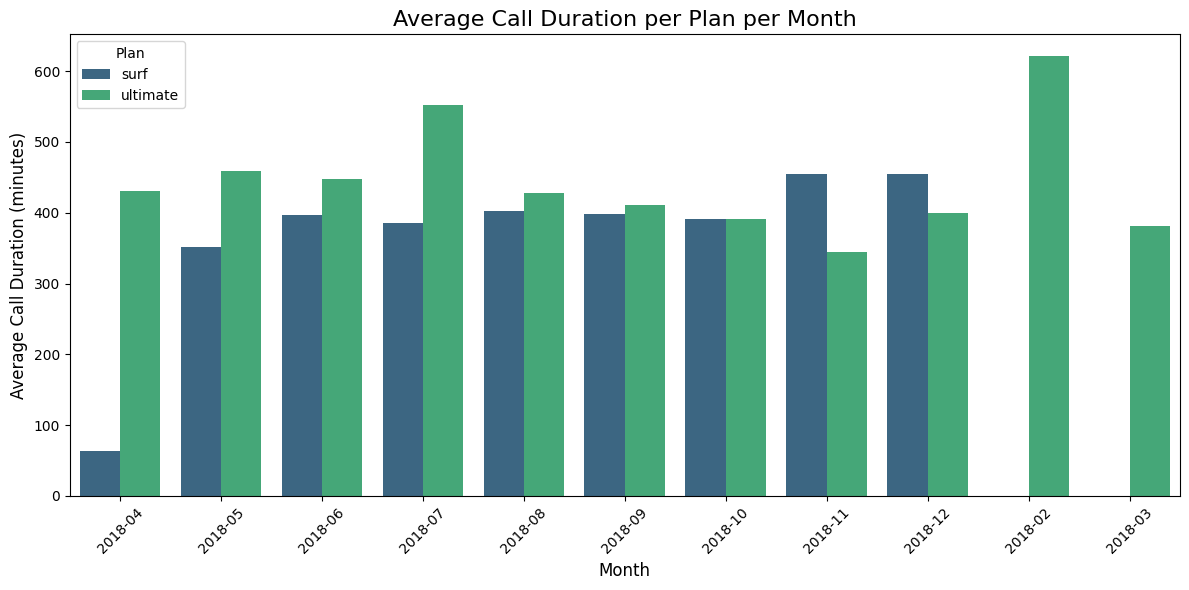

In [50]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

# Calculate average duration of calls per plan per month
avg_call_duration_per_plan_month = user_revenue_data.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()

# Rename columns for clarity
avg_call_duration_per_plan_month.rename(columns={'total_minutes': 'avg_call_duration'}, inplace=True)

# Plot a bar plot to visualize the average call duration per plan per month
plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_call_duration_per_plan_month,
    x='month',
    y='avg_call_duration',
    hue='plan',
    palette='viridis'
)

# Customize the plot
plt.title('Average Call Duration per Plan per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Call Duration (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Plan', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()



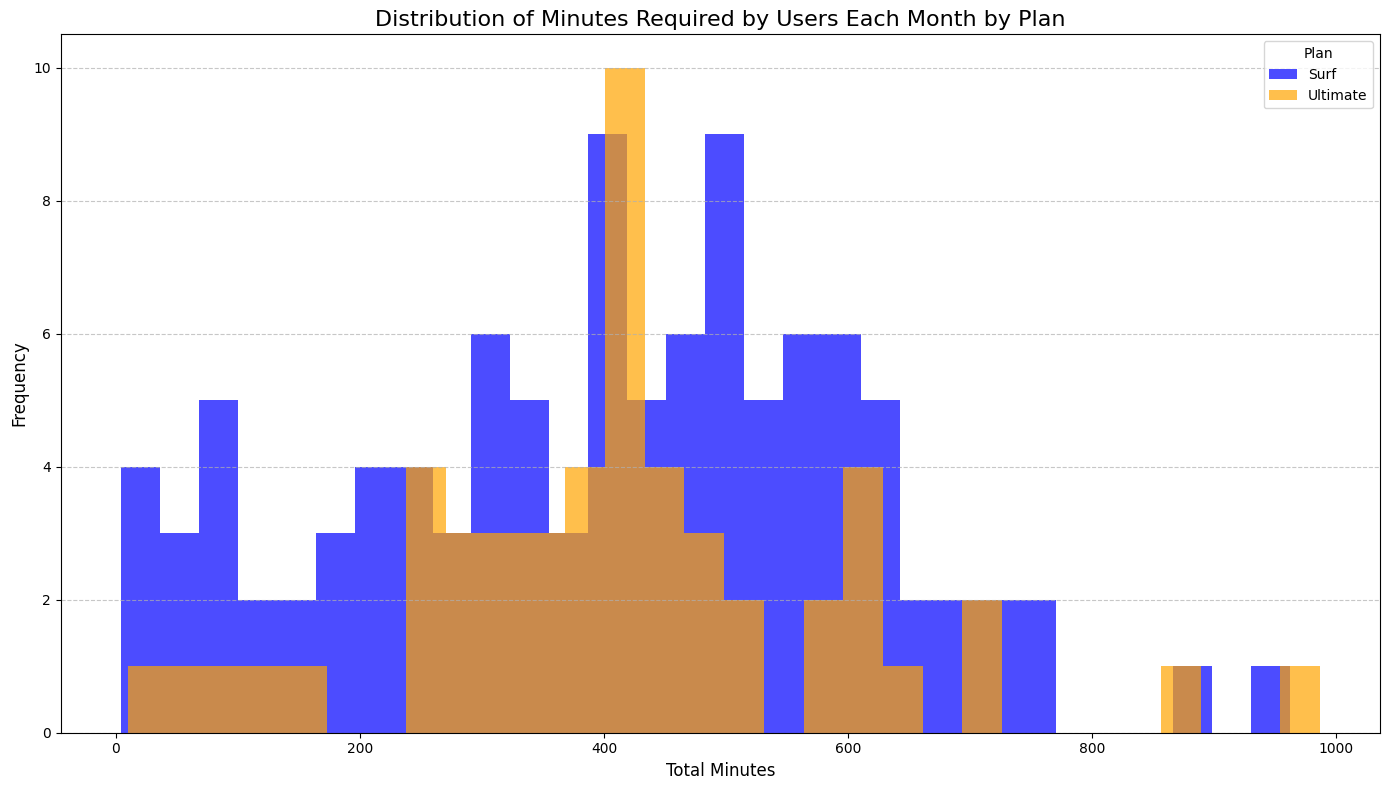

In [51]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

# Plot histograms for the number of minutes required by users of each plan
plt.figure(figsize=(14, 8))

# Histogram for the 'surf' plan
plt.hist(
    user_revenue_data[user_revenue_data['plan'] == 'surf']['total_minutes'],
    bins=30,
    alpha=0.7,
    label='Surf',
    color='blue'
)

# Histogram for the 'ultimate' plan
plt.hist(
    user_revenue_data[user_revenue_data['plan'] == 'ultimate']['total_minutes'],
    bins=30,
    alpha=0.7,
    label='Ultimate',
    color='orange'
)

# Customize the plot
plt.title('Distribution of Minutes Required by Users Each Month by Plan', fontsize=16)
plt.xlabel('Total Minutes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Plan', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [52]:
# Calculate the mean and the variance of the monthly call duration
# Group the data by plan and calculate the mean and variance of total_minutes
call_duration_stats = user_revenue_data.groupby('plan')['total_minutes'].agg(['mean', 'var']).reset_index()

# Rename the columns for better clarity
call_duration_stats.rename(columns={'mean': 'mean_minutes', 'var': 'variance_minutes'}, inplace=True)

# Display the results
print(call_duration_stats)



       plan  mean_minutes  variance_minutes
0      surf    402.685714      42104.525275
1  ultimate    419.384615      33955.064857


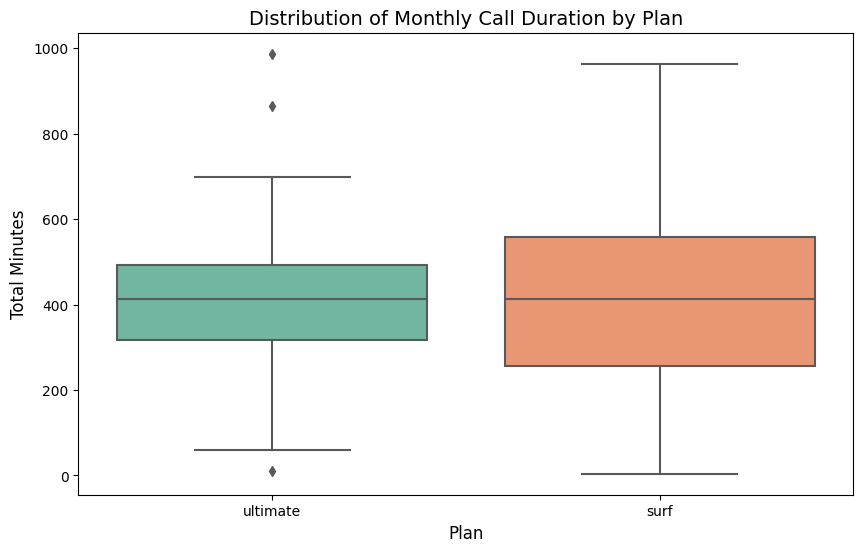

In [53]:
# Plot a boxplot to visualize the distribution of the monthly call duration

# Create a boxplot for the distribution of monthly call duration per plan
plt.figure(figsize=(10, 6))
sns.boxplot(data=user_revenue_data, x='plan', y='total_minutes', palette='Set2')

# Add labels and title
plt.title('Distribution of Monthly Call Duration by Plan', fontsize=14)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Total Minutes', fontsize=12)

# Display the plot
plt.show()

Users on the Ultimate plan have a more consistent call duration with a narrower range of variability, suggesting more predictable behavior.

Surf plan users show greater variability, with higher maximum call durations and a wider spread, indicating diverse calling behaviors.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

All right

### Messages

               mean         var
plan                           
surf      38.948052  720.418319
ultimate  33.285714  710.745645


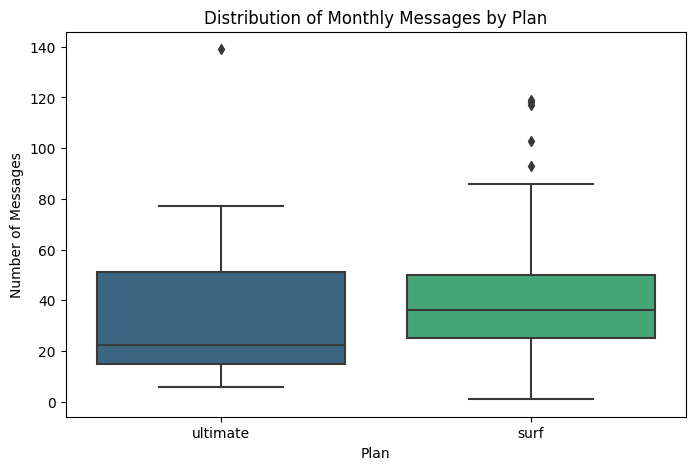

In [54]:
# Compare the number of messages users of each plan tend to send each month

user_monthly_usage = user_monthly_usage.merge(users_df[['user_id', 'plan']], on='user_id', how='left')


# Calculate the mean and variance of messages per plan
messages_stats = user_monthly_usage.groupby('plan')['num_messages'].agg(['mean', 'var'])
print(messages_stats)

# Plot a boxplot for the number of messages sent per plan
plt.figure(figsize=(8, 5))
sns.boxplot(x='plan', y='num_messages', data=user_monthly_usage, palette='viridis')
plt.title('Distribution of Monthly Messages by Plan')
plt.ylabel('Number of Messages')
plt.xlabel('Plan')
plt.show()


                  mean           var
plan                                
surf      16151.078654  5.665025e+07
ultimate  15860.188654  3.908100e+07


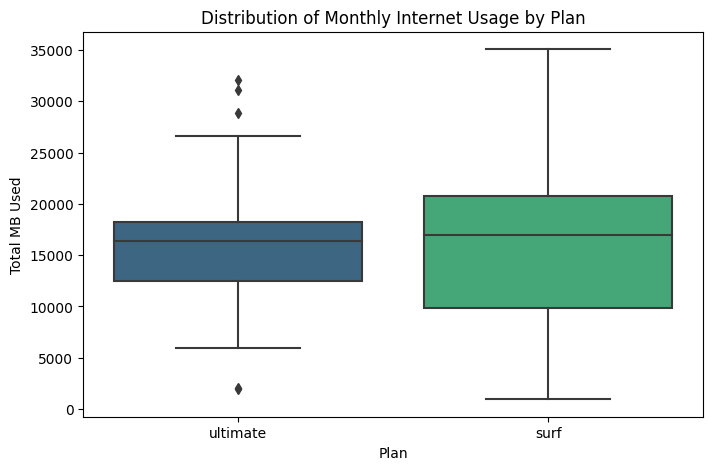

In [55]:
# Compare the amount of internet traffic consumed by users per plan

# Calculate the mean and variance of internet traffic (MB used) per plan
internet_stats = user_monthly_usage.groupby('plan')['total_mb_used'].agg(['mean', 'var'])
print(internet_stats)

# Plot a boxplot for the amount of internet traffic consumed per plan
plt.figure(figsize=(8, 5))
sns.boxplot(x='plan', y='total_mb_used', data=user_monthly_usage, palette='viridis')
plt.title('Distribution of Monthly Internet Usage by Plan')
plt.ylabel('Total MB Used')
plt.xlabel('Plan')
plt.show()


users on the ultimate plan tend to use a significantly higher amount of internet data each month compared to users on the surf plan. The ultimate plan shows a wider spread and more outliers, indicating greater variability in data usage. Conversely, the surf plan users exhibit more consistent, moderate data usage each month.

### Internet

                  mean           var
plan                                
surf      16151.078654  5.665025e+07
ultimate  15860.188654  3.908100e+07


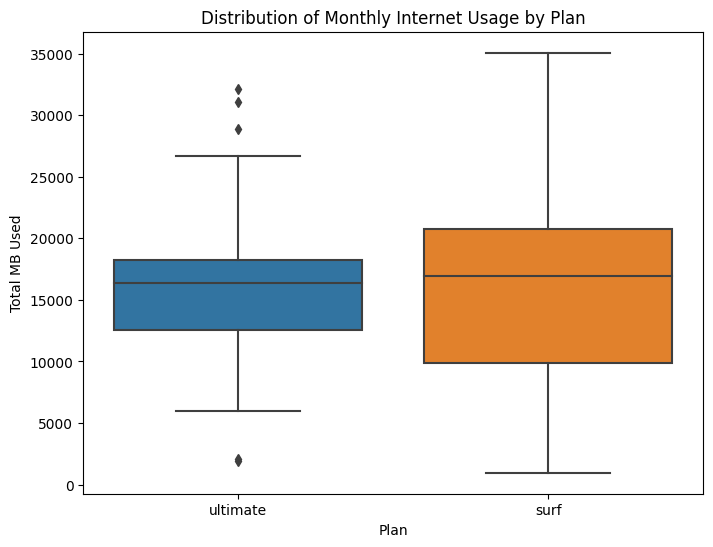

In [56]:
# Compare the amount of internet users of each plan tend to use each month
# Calculate the mean and variance of internet usage per plan
internet_stats = user_monthly_usage.groupby('plan')['total_mb_used'].agg(['mean', 'var'])
print(internet_stats)

# Plot a boxplot for the monthly internet usage per plan
plt.figure(figsize=(8, 6))
sns.boxplot(data=user_monthly_usage, x='plan', y='total_mb_used')
plt.title('Distribution of Monthly Internet Usage by Plan')
plt.xlabel('Plan')
plt.ylabel('Total MB Used')
plt.show()

The users on both plans tend to consume similar amounts of internet traffic on average, with the Surf plan showing slightly higher mean usage. However, the variance in usage is higher for Surf plan users, indicating that their internet usage is more unpredictable compared to Ultimate plan users, who exhibit more consistent usage patterns.

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

               mean          sum
plan                            
surf      54.278688  5699.262227
ultimate  70.232952  3652.113486


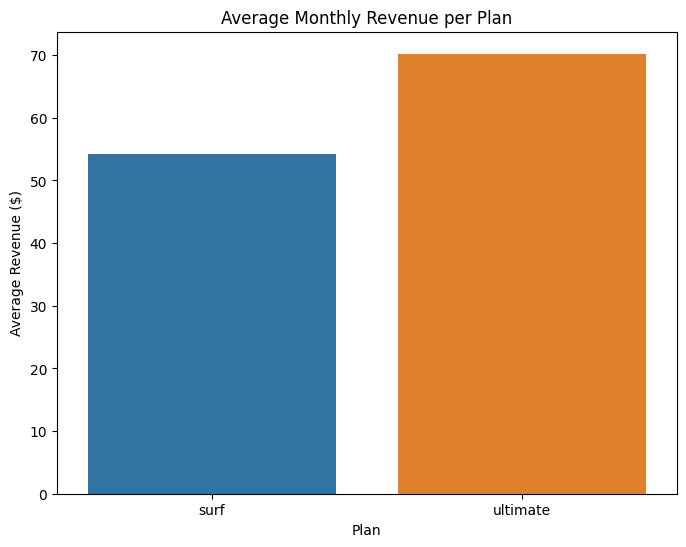

In [57]:
#compare revenue of each plan
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'plan' and calculate the mean and sum of total revenue for each plan
revenue_comparison = user_revenue_data.groupby('plan')['total_revenue'].agg(['mean', 'sum'])

# Display the revenue comparison
print(revenue_comparison)

# Visualize the revenue comparison using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=revenue_comparison.index, y=revenue_comparison['mean'])
plt.title('Average Monthly Revenue per Plan')
plt.xlabel('Plan')
plt.ylabel('Average Revenue ($)')
plt.show()



According to this comparison,ultimate plan is generating highest revenue compared with the surf plan.

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [58]:
# Test the hypotheses

import scipy.stats as stats

# Filter the data for Ultimate and Surf plans
ultimate_revenue = user_revenue_data[user_revenue_data['plan'] == 'ultimate']['total_revenue']
surf_revenue = user_revenue_data[user_revenue_data['plan'] == 'surf']['total_revenue']

# Perform the Independent t-test
t_stat, p_value = stats.ttest_ind(ultimate_revenue, surf_revenue)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Decide on the hypothesis based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average revenue between the two plans.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average revenue between the two plans.")




T-statistic: 2.540289298114406
P-value: 0.012059750271360435
Reject the null hypothesis: There is a significant difference in the average revenue between the two plans.


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [59]:
# Test the hypotheses

import scipy.stats as stats

# Assuming 'city' contains the region information and we can derive 'NY-NJ' region from it
# Create a new column 'region' based on 'city'
user_revenue_data['region'] = user_revenue_data['user_id'].map(
    users_df.set_index('user_id')['city'].apply(lambda x: 'NY-NJ' if 'NY-NJ' in x else 'Other')
)

# Now filter the data for users in the NY-NJ area and users from other regions
ny_nj_revenue = user_revenue_data[user_revenue_data['region'] == 'NY-NJ']['total_revenue']
other_region_revenue = user_revenue_data[user_revenue_data['region'] != 'NY-NJ']['total_revenue']

# Perform the Independent t-test
t_stat, p_value = stats.ttest_ind(ny_nj_revenue, other_region_revenue)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Decide on the significance level (alpha = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average revenue between the NY-NJ and other regions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average revenue between the NY-NJ and other regions.")


T-statistic: -1.5351489246220984
P-value: 0.12678596883884927
Fail to reject the null hypothesis: There is no significant difference in the average revenue between the NY-NJ and other regions.


## General conclusion

Based on the analyses conducted, we can conclude that users on the Ultimate plan tend to generate higher revenues compared to those on the Surf plan, with a significant difference in their average revenue. The comparison between regions showed no significant revenue difference between users in the NY-NJ area and other regions, indicating that regional factors do not notably affect user spending. Our exploration of call, message, and data usage revealed that the calling behavior is more varied among Ultimate plan users, while Surf plan users tend to have more predictable usage. This suggests that the Ultimate plan is more suitable for heavy users who exceed their plan limits, whereas the Surf plan works well for users with lower usage demands. Overall, the analysis suggests that plan selection depends significantly on user behavior patterns, with Ultimate offering more flexibility for high-demand users.


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

You've done a great job. There are a few things that need to be fixed

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__


Otherwise it's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊